In [1]:
'''

df = pd.read_csv('C:\DiabetesData\Diabetes_Dataset.csv')

# Assume that you are trying to predict a multi-class outcome variable 'y' based on some features 'X1', 'X2', 'X3'
X = df[['AGE','Urea', 'Cr', 'HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']]
y = df['CLASS']

'''

"\n\ndf = pd.read_csv('C:\\DiabetesData\\Diabetes_Dataset.csv')\n\n# Assume that you are trying to predict a multi-class outcome variable 'y' based on some features 'X1', 'X2', 'X3'\nX = df[['AGE','Urea', 'Cr', 'HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']]\ny = df['CLASS']\n\n"

In [2]:
import pandas as pd
df = pd.read_csv('C:/Users/revna/Desktop/Github/AI-DS-Projects/Diabetes/Dataset/Diabetes_Dataset.csv')
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,177,45364,F,20,4.6,70,9.6,4.1,1.8,1.0,2.3,0.8,30.0,Y
1,147,45365,F,25,10.0,35,4.0,4.3,3.5,0.8,1.3,0.8,22.0,N
2,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
3,129,45416,M,26,7.5,79,8.8,3.5,2.0,2.0,0.9,0.5,28.0,Y
4,67,34222,F,28,4.1,73,4.9,5.3,3.2,0.8,0.8,0.9,24.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,165,45412,F,77,5.0,106,5.4,3.9,2.1,1.2,4.2,1.1,24.0,N
996,186,454316,M,77,5.0,106,5.4,0.0,2.8,0.8,1.8,0.7,19.0,N
997,339,5980,M,77,6.2,99,7.2,3.2,1.1,0.8,2.0,0.5,29.0,Y
998,389,24101,M,77,6.2,99,7.2,3.2,1.1,0.8,2.0,0.5,29.0,Y


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier #inbuilt library in sklearn for stacking classifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score #Evaluation metrics
from sklearn.tree import DecisionTreeClassifier #Decision Trees
from sklearn.svm import SVC #Support Vector
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.linear_model import Perceptron, LogisticRegression # Perceptron and Logistic Regression. Logistic Regression is also used as meta classifier 
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bayes
from xgboost import XGBClassifier # Only algorithm which was not inbuilt in sklearn library 
from sklearn.preprocessing import LabelEncoder # Used for sorting error which was constantly appearing of the target variable

# Load your dataset
df = pd.read_csv('C:\DiabetesData\Diabetes_Dataset.csv')

X = df[['AGE','Urea', 'Cr', 'HbA1c','Chol','TG','HDL','LDL','VLDL','BMI']] #The attributes which are used for analysis
y = df['CLASS'] # Target 

# The next 3 lines of code is due to inferring invalid classes from unique values (the error mentioned above)
# Remove leading and trailing spaces
y = y.str.strip()

# Create a label encoder
label_encoder = LabelEncoder()

# Fit the encoder and transform 'y'
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the base classifiers
base_classifiers = [
    ('dt', DecisionTreeClassifier()), #Decision Trees
    ('svm', SVC()), #Support Vector Machine/Classifier
    ('ada', AdaBoostClassifier()), #AdaBoost
    ('xgb', XGBClassifier()), #XGBoost
    ('lda', LinearDiscriminantAnalysis()), #LDA
    ('per', Perceptron()), #Perceptron
    ('knn', KNeighborsClassifier()), #KNN
    ('gnb', GaussianNB()), #K Nearest Neighbor
    ('rf', RandomForestClassifier()), #Random Forests
    ('gb', GradientBoostingClassifier()), # Gradient Boosting
    ('lr', LogisticRegression(max_iter=10000)), #Logistic Regression. Maximum Iterations increased and specified
    ('et', ExtraTreesClassifier()), # ExtraTrees
    ('bag', BaggingClassifier()) # Bagging 
]

# Initialize the stacking classifier - Basically here we create a class called stacking_clf 
stacking_clf = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(max_iter=10000))

# Train the classifiers
stacking_clf.fit(X_train, y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluation Metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
print('Kappa Index:', cohen_kappa_score(y_test, y_pred))

Accuracy: 0.995
Precision: 0.9952500000000001
Recall: 0.995
F1-Score: 0.995056727932834
Kappa Index: 0.9814281734608599


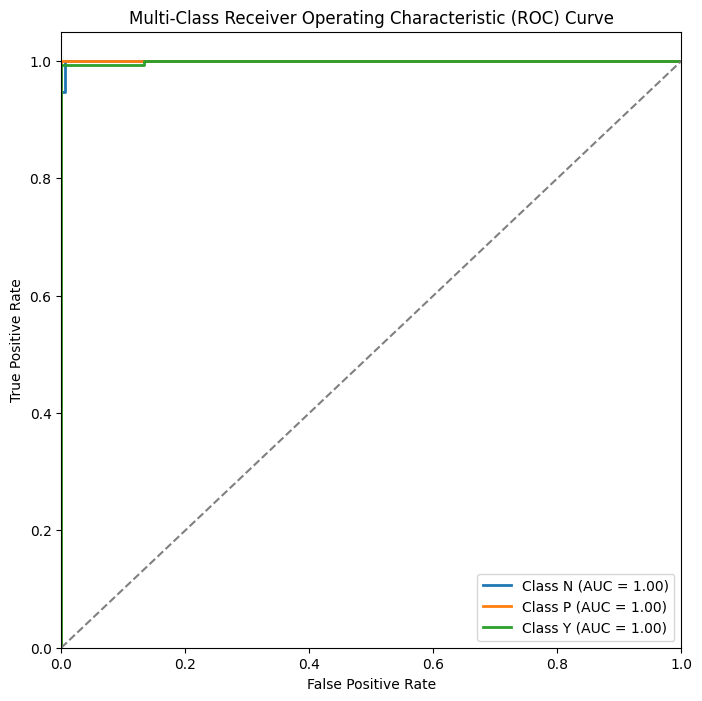

Accuracy: 0.995
Precision: 0.9952500000000001
Recall: 0.995
F1-Score: 0.995056727932834
Kappa Index: 0.9814281734608599


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

# Load dataset
df = pd.read_csv('C:\DiabetesData\Diabetes_Dataset.csv')

X = df[['AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']]
y = df['CLASS'].str.strip()  # Remove spaces from labels

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts to 1D array of integers

# Convert labels to one-hot encoding for multi-class ROC curve
y_one_hot = label_binarize(y, classes=np.unique(y))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test_one_hot = label_binarize(y_test, classes=np.unique(y))  # One-hot encode test labels

# Define base classifiers (only those supporting `predict_proba`)
base_classifiers = [
    ('dt', DecisionTreeClassifier()),
    ('svm', SVC(probability=True)),  # Enable probability estimates for SVM
    ('ada', AdaBoostClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('rf', RandomForestClassifier()),
    ('gb', GradientBoostingClassifier()),
    ('lr', LogisticRegression(max_iter=10000)),
    ('et', ExtraTreesClassifier()),
    ('bag', BaggingClassifier())
]

# Initialize One-Vs-Rest Stacking Classifier
stacking_clf = OneVsRestClassifier(
    StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression(max_iter=10000))
)

# Train the model
stacking_clf.fit(X_train, y_train)

# Get predicted probabilities for each class
y_scores = stacking_clf.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))

for i in range(y_one_hot.shape[1]):  # Loop over each class
    fpr, tpr, _ = roc_curve(y_test_one_hot[:, i], y_scores[:, i])  # Compute ROC
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, lw=2, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot reference line
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluation Metrics (using predicted class labels)
y_pred = stacking_clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('F1-Score:', f1_score(y_test, y_pred, average='weighted'))
print('Kappa Index:', cohen_kappa_score(y_test, y_pred))


In [5]:
from sklearn.metrics import confusion_matrix

# Assuming y_test are your true labels and y_pred are the predicted labels
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[ 19   0   0]
 [  0  11   0]
 [  1   0 169]]


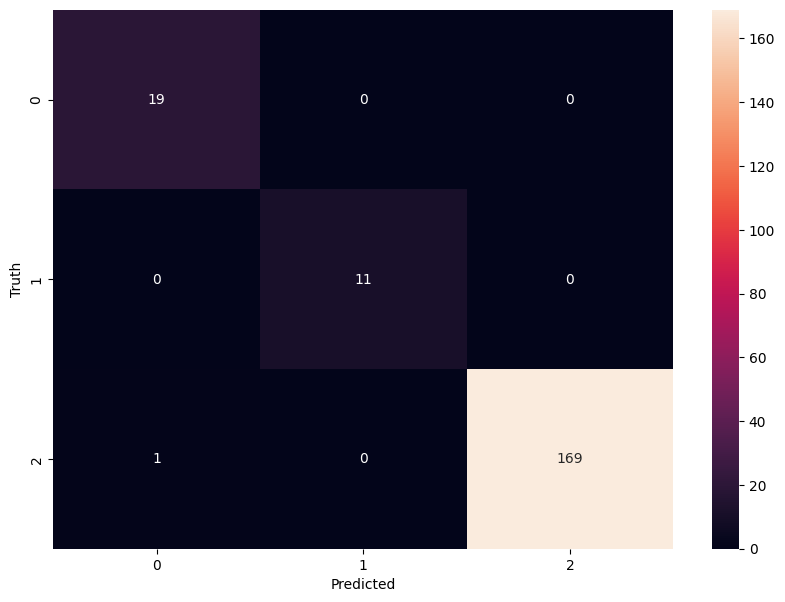

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()